# Activity 0

In [4]:
# Display figures and images inline
%matplotlib inline

# Imports
from matplotlib.pyplot import imread, imshow, imsave, figure
import numpy
import requests
import StringIO

# Functions
def display_image(image, enlarge=False):
    ''' Display image (enlarge if specified) '''
    if enlarge:
        figure(figsize=(10, 8))
    imshow(numpy.asarray(image).astype('uint8'))

def read_image(path, format='JPG'):
    ''' Read image from path or URL '''
    if path.startswith('http'):
        data  = StringIO.StringIO(requests.get(path).content)
        image = imread(data, format=format)
    else:
        image = imread(path)
    return image

def save_image(path, image):
    ''' Save image to specified path '''
    imsave(path, numpy.asarray(image).astype('uint8'))

def create_image(width, height, default_color=(0, 0, 0)):
    ''' Create image with specified width, height, and default color '''
    image = []

    for row in range(height):
        image_row = []
        for column in range(width):
            image_row.append(default_color)
        image.append(image_row)

    return image

def copy_image(source):
    ''' Return copy of source image '''
    height = len(source)
    width  = len(source[0])
    target = []

    for row in range(height):
        target_row = []
        for column in range(width):
            target_row.append(source[row][column])
        target.append(target_row)

    return target

# Activity 1

In [31]:
def make_checkered_image(width, height, square_size, colors):
    image    = []
    r = 1
    c = 1
 
    for row in range(height):
        image_row = []
        if row == r * square_size:
            r += 1
        c = 1
        for column in range(width):
            if column == c * square_size:
                c += 1
            
            if r % 2 == 0 and c % 2 == 0:
                image_row.append(colors[0])
            elif r % 2 == 1 and c % 2 == 1:
                image_row.append(colors[0])
            else:
                image_row.append(colors[1])
        image.append(image_row)
  

    return image 



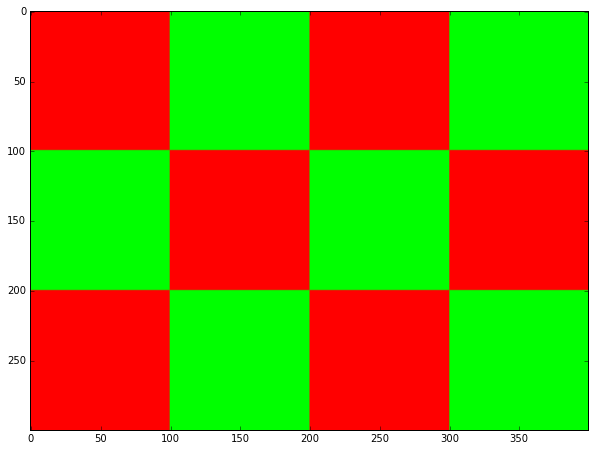

In [119]:
COLORS = [
  (255, 0, 0),
  (0, 255, 0),
]
WIDTH  = 400
HEIGHT = 300

display_image(make_checkered_image(WIDTH, HEIGHT, 100, COLORS), True)

In [20]:
def make_gradient_image(width, height, colors):
    image = []
    color_0 = [colors[0][0], colors[0][1], colors[0][2]]
    color_1 = [colors[1][0], colors[1][1], colors[1][2]]

    for row in range(height):
        image_row = []
        x = 1
        for column in range(width):
            progress = float(column) / width
            pcolor_0 = [num * (1 - progress) for num in color_0]
            pcolor_1 = [num * (progress) for num in color_1]
            new_color = [a + b for a,b in zip(pcolor_0,pcolor_1)]
            image_row.append(new_color)
            x += 1
        image.append(image_row)

    return image



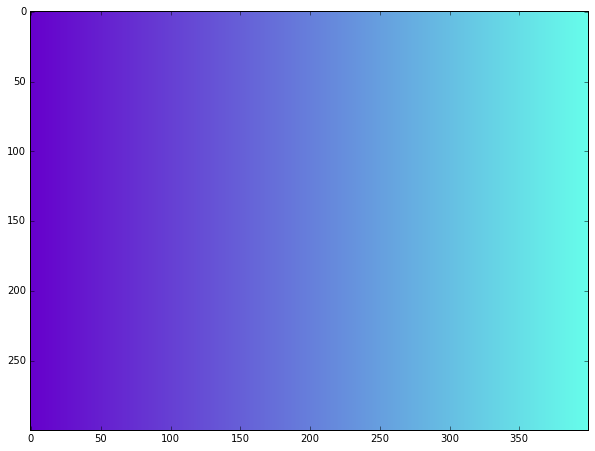

In [120]:
COLORS = [
  (102, 0, 204),
  (102, 255, 235),
]
WIDTH  = 400
HEIGHT = 300

display_image(make_gradient_image(WIDTH, HEIGHT, COLORS), True)

In [51]:
def make_image_from_template(template, block_size, color_map):
    
    
    image = []
    color = []
    c     = 0

    for row in range(block_size): 
        for string in template:
            for letter in string:
                color.append(color_map[letter])

        image_row = []
        for column in range(block_size):
            new_color = color[c]
            image_row.append(new_color)
            c += 1
         
            
        image.append(image_row)


    return image

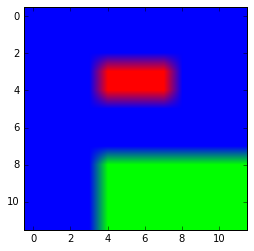

In [52]:
TEMPLATE = [
    'PPPPPPPPPPPP',
    'PPPPPPPPPPPP',
    'PPPPPPPPPPPP',
    'PPPP____PPPP',
    'PPPP____PPPP',
    'PPPPPPPPPPPP',
    'PPPPPPPPPPPP',
    'PPPPPPPPPPPP',
    'PPPP        ',
    'PPPP        ',
    'PPPP        ',
    'PPPP        ',
]

COLOR_MAP = {
    'P': (0, 0, 255),
    '_': (255, 0, 0),
    ' ': (0, 255, 0)
}

HEIGHT = 400
WIDTH  = 300

display_image(make_image_from_template(TEMPLATE, 12, COLOR_MAP))

### Questions

1) Hi so there were no questions that I saw. This is odd.

# Activity 2

In [128]:
def blend_images(image0, image1, weight):
    height = len(image0)
    width  = len(image0[0])
    image = []
    
    for row in range(height):
        image_row = []
        for column in range(width):
            color0  = image0[row][column]
            color1  = image1[row][column]
            pcolor0 = [num * (1 - weight) for num in color0]
            pcolor1 = [num * (weight) for num in color1]
            new_color = [a + b for a,b in zip(pcolor0,pcolor1)]
            image_row.append(new_color)
        image.append(image_row)
    return image

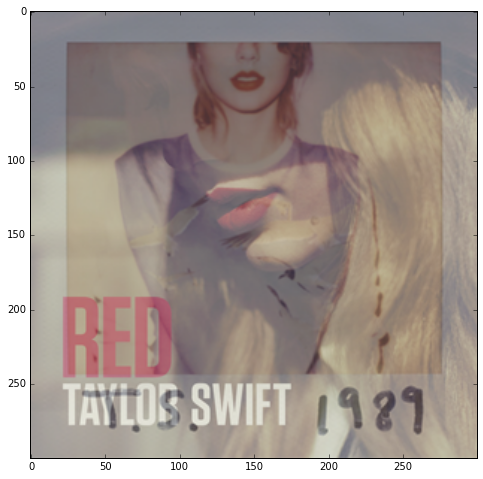

In [129]:
image0 = read_image('https://upload.wikimedia.org/wikipedia/en/e/e8/Taylor_Swift_-_Red.png')
image1 = read_image('https://upload.wikimedia.org/wikipedia/en/f/f6/Taylor_Swift_-_1989.png')

display_image(blend_images(image0, image1, 0.50), True)

In [36]:
def replace_colors(image, color_map):
    result = []
    height = len(image)
    width  = len(image[0])
    
    for row in range(height):
        pixels = []
        for column in range(width):
            pixel = image[row][column]
            if pixel in color_map:
                new_pixel = color_map[pixel]
            else:
                new_pixel = pixel
            pixels.append(new_pixel)
        result.append(pixels)
    return result

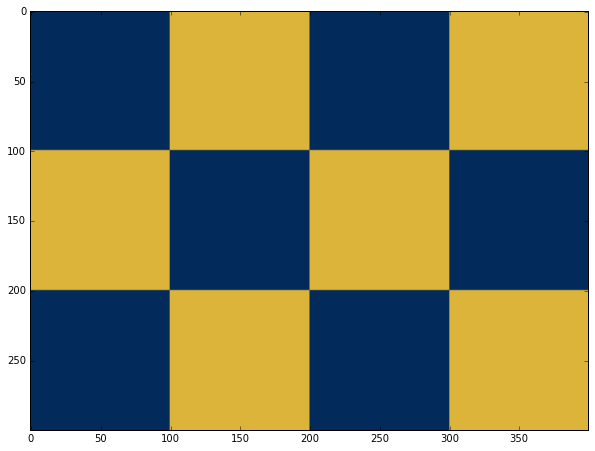

In [38]:
COLORS = [
  (255, 0, 0),
  (0, 255, 0),
]

WIDTH  = 400
HEIGHT = 300

COLOR_MAP = {
    (255, 0, 0): (2, 43, 91),
    (0, 255, 0): (220, 180, 57),
}

checkered = make_checkered_image(WIDTH, HEIGHT, 100, COLORS)

display_image(replace_colors(checkered, COLOR_MAP), True)

In [71]:
def pixelate_image(source, block_size):
    image    = []
    c = 1
    height = len(source)
    width  = len(source[0])
    r = 1
    blurcol = []
    blurrow = []
    
    for row in range(height):
        c = 1
        if row == r * block_size / 2:
                blurrow.append(row)
                r += 1
        for column in range(width):
            if column == c * block_size / 2:
                blurcol.append(column)
                c += 1
                
    r = 1
    c = 1
    for row in range(height):
        image_row = []
        c = 1
        if row == r * block_size:
            r += 1
        for column in range(width):
            if column == c * block_size:
                c += 1
            pixel = source[blurrow[r]][blurcol[c]]
            image_row.append(pixel)
        image.append(image_row)
    return image

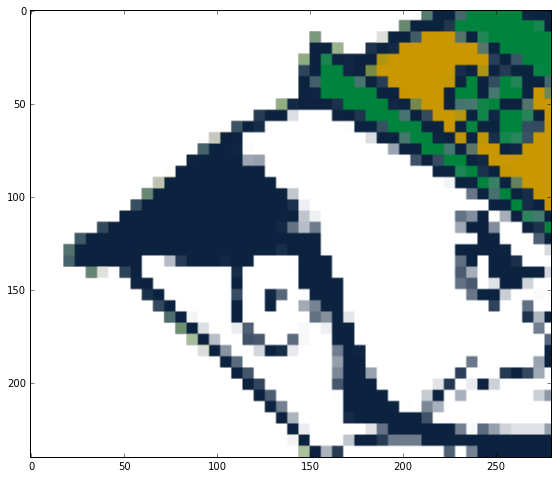

In [74]:
source = read_image('https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/NDLeprechaun.svg/280px-NDLeprechaun.svg.png')
display_image(pixelate_image(source, 6), True)

### Questions

1) Hi so there were no questions that I saw. This is odd.